## LAB 4:


In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
df = pd.read_excel("new_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
10%,0.640000,563.500000,269.500000,122.500000,3.50000,2.000000,0.100000,1.00000,11.217000,14.237000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
90%,0.900000,784.000000,367.500000,220.500000,7.00000,5.000000,0.400000,5.00000,36.703000,37.422000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

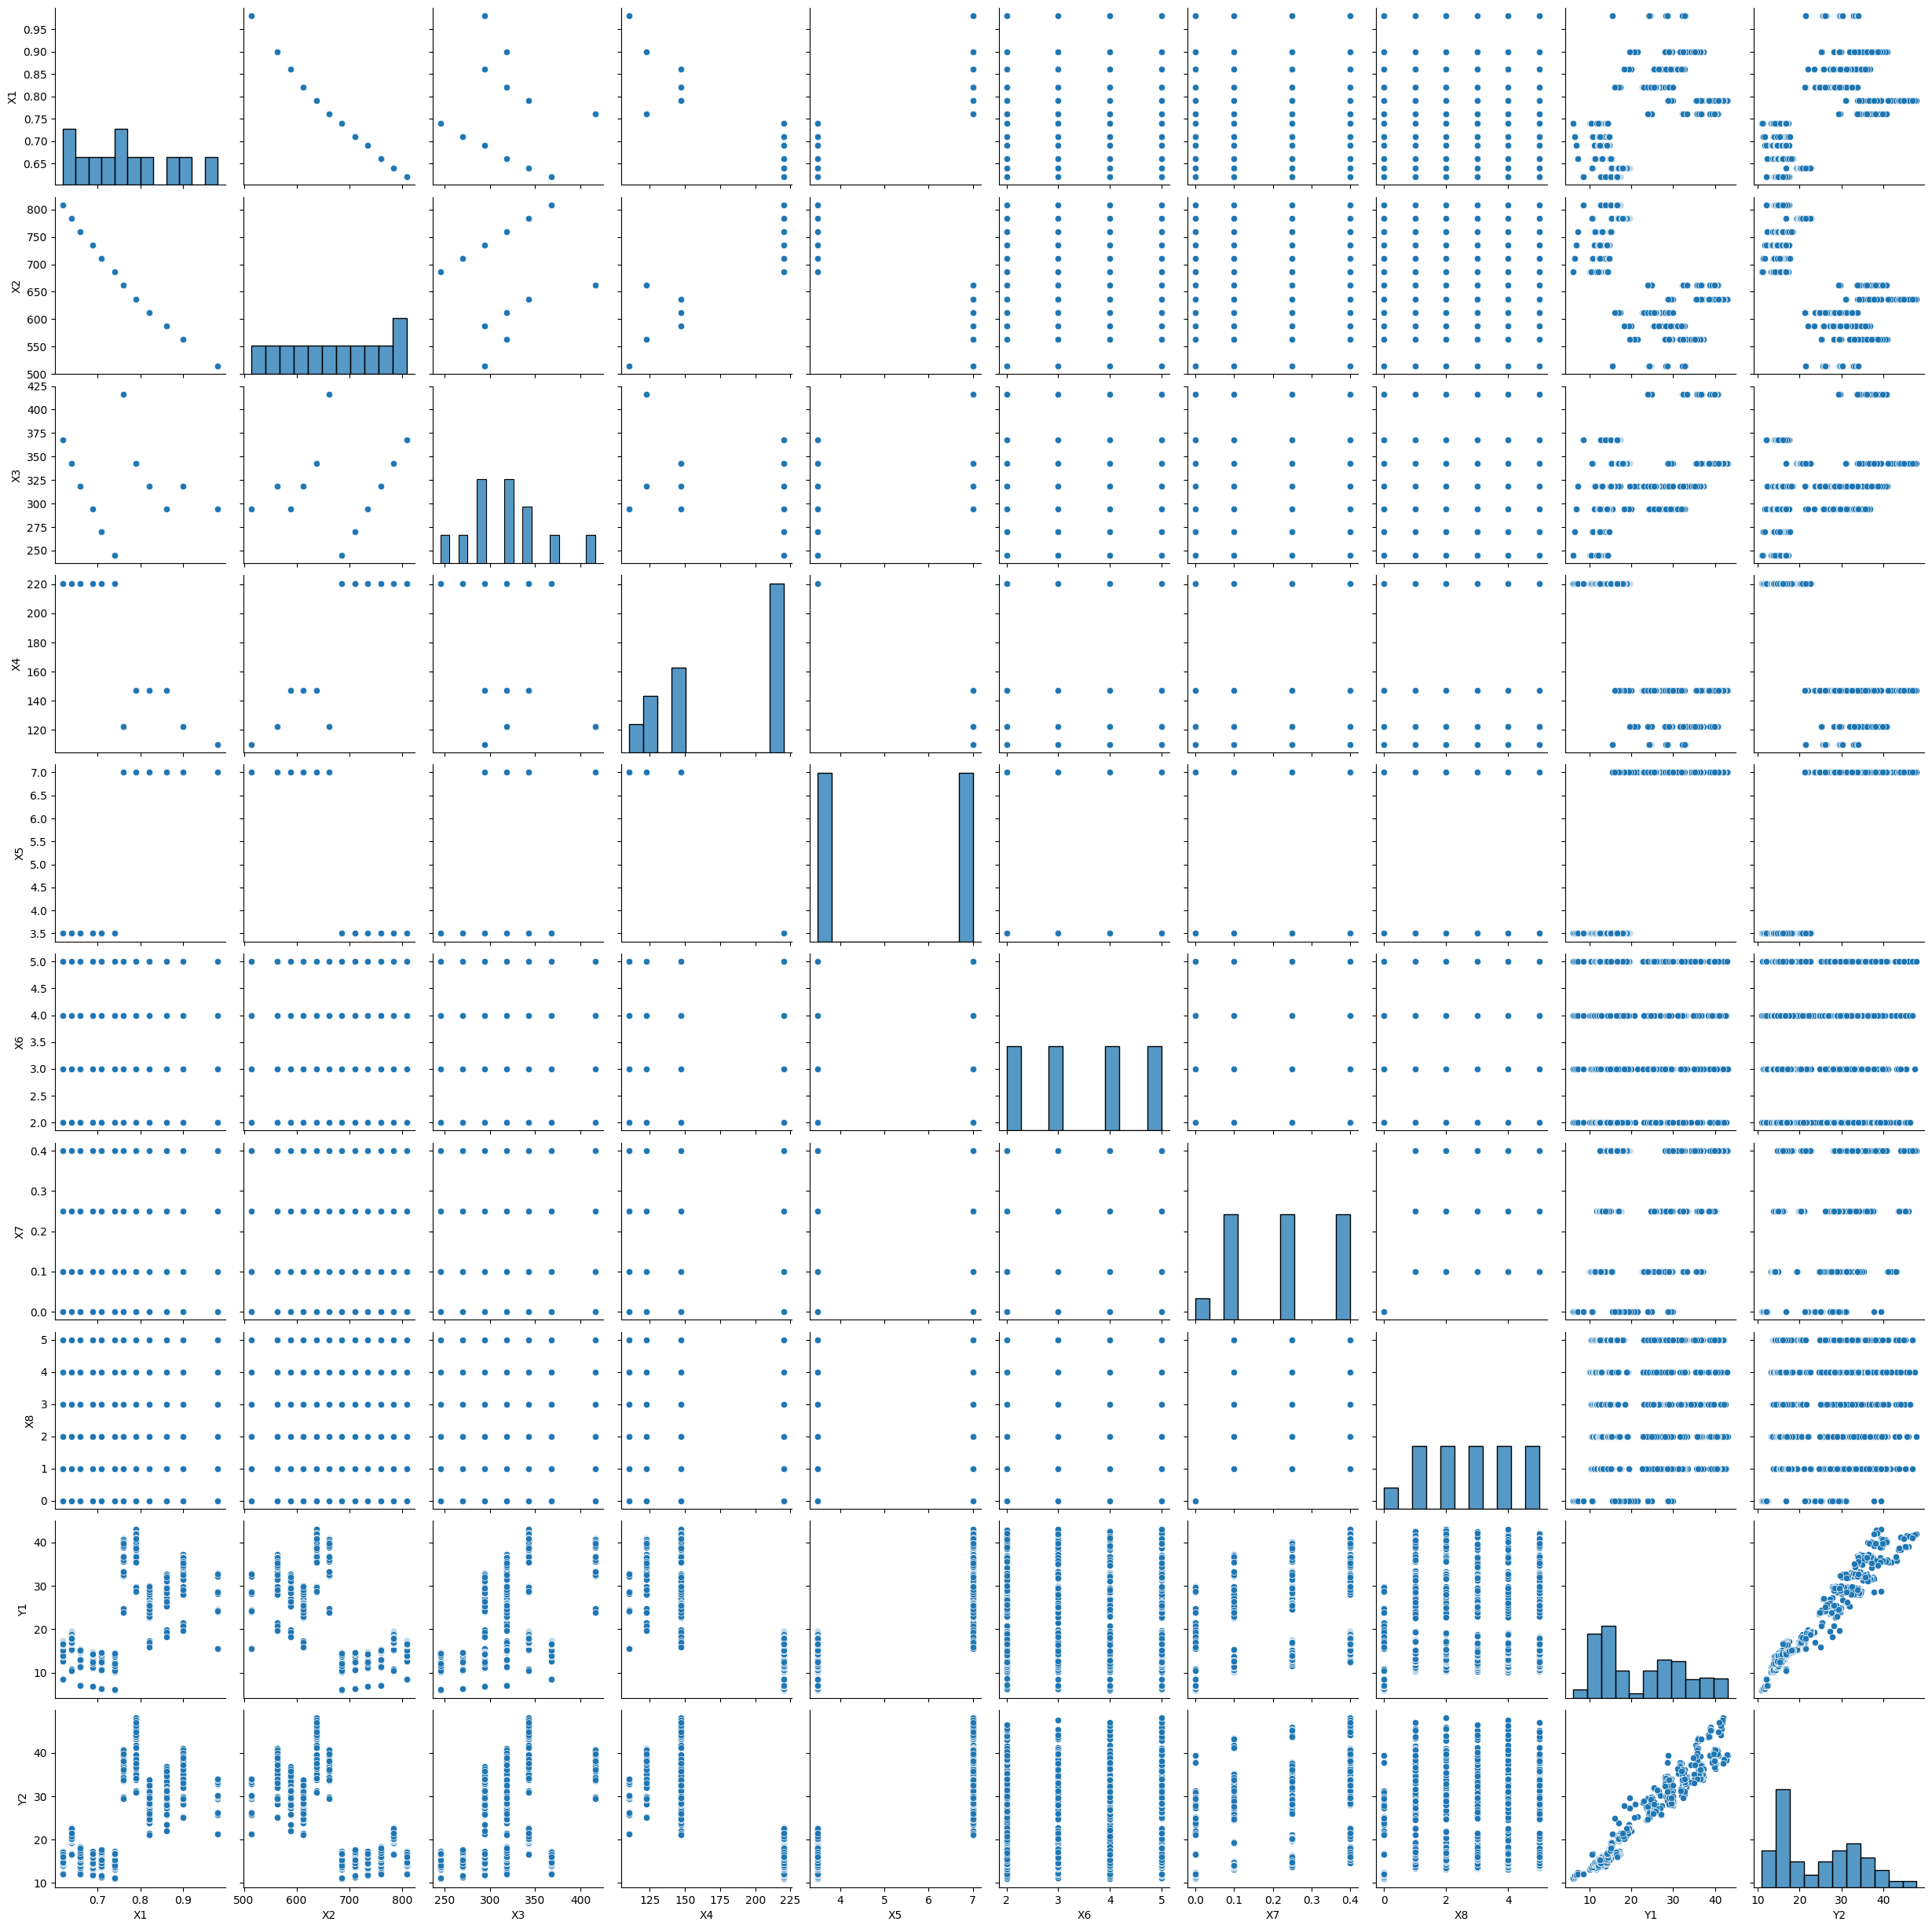

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,5.878473e-17,-2.096261e-15,-1.896390e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.066832e-17,3.623317e-15,2.441409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.510469e-17,-8.647953e-17,2.077332e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.591507e-17,-1.753224e-15,-1.068485e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.876676e-17,-1.977685e-16,-9.524163e-17,0.889430,0.895785
X6,5.878473e-17,-3.066832e-17,-2.510469e-17,-5.591507e-17,4.876676e-17,1.000000e+00,-9.366058e-16,-2.608346e-16,-0.002587,0.014290
X7,-2.096261e-15,3.623317e-15,-8.647953e-17,-1.753224e-15,-1.977685e-16,-9.366058e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-1.896390e-16,2.441409e-15,2.077332e-16,-1.068485e-15,-9.524163e-17,-2.608346e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<Axes: >

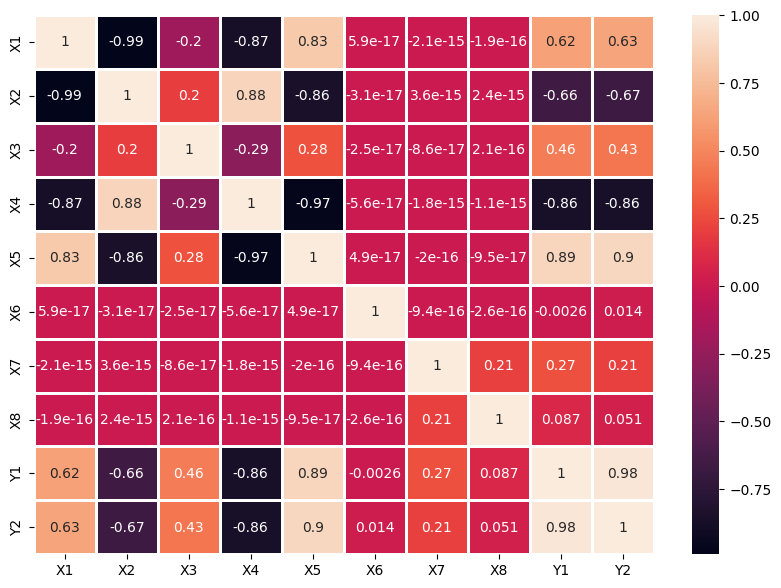

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

## FEATURE AND VARIABLE SETS


In [13]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column


['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

In [14]:
# Drop Cooling Load (Y2)
df = df.drop(columns=['Y2'])

In [15]:
## dependent and independent features
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]  # Independent variables
y = df[['Y1']]  # output regression

In [16]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (768, 8)
Variable set size: (768, 1)


In [17]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [18]:
y.head()

,Y1
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84


## TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

In [20]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (537, 8)
Test feature set size: (231, 8)
Training variable set size: (537, 1)
Test variable set size: (231, 1)


## MODEL FIT AND TRAINING

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [23]:
lm.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [84.41168151]


In [25]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[-6.64368983e+01 -6.19935014e-02  3.33138558e-02 -4.76536786e-02
   4.39155180e+00 -7.02699620e-02  2.08443228e+01  1.68608292e-01]]


In [26]:
cdf = pd.DataFrame(lm.coef_.T, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
X1,-66.436898
X2,-0.061994
X3,0.033314
X4,-0.047654
X5,4.391552
X6,-0.070270
X7,20.844323
X8,0.168608


In [27]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se = [0] * k
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[
        list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

/Users/apple/Desktop/mlpython/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:81: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,Coefficients,Standard Error,t-statistic
X1,-66.436898,Y1 1.199409 dtype: float64,Y1 -55.391372 dtype: float64
X2,-0.061994,Y1 0.00144 dtype: float64,Y1 -43.041543 dtype: float64
X3,0.033314,Y1 0.002926 dtype: float64,Y1 11.386 dtype: float64
X4,-0.047654,Y1 0.002852 dtype: float64,Y1 -16.710852 dtype: float64
X5,4.391552,Y1 0.073802 dtype: float64,Y1 59.50429 dtype: float64
X6,-0.070270,Y1 0.114999 dtype: float64,Y1 -0.611046 dtype: float64
X7,20.844323,Y1 0.977147 dtype: float64,Y1 21.331828 dtype: float64
X8,0.168608,Y1 0.082138 dtype: float64,Y1 2.052752 dtype: float64


## R square

In [28]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.915


### Prediction, error estimate, and regression evaluation matrices

In [29]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (231, 1)


**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

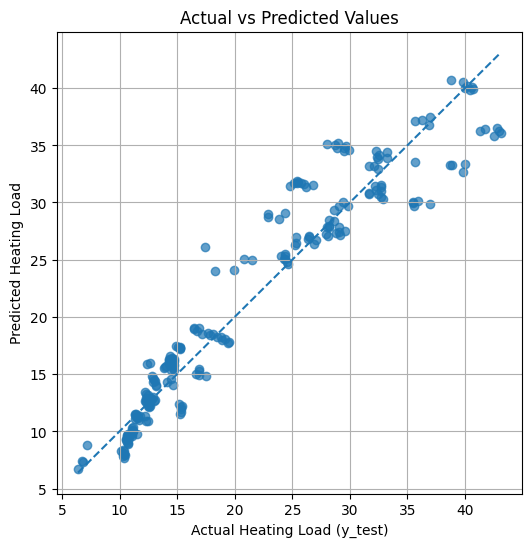

In [30]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = lm.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Heating Load (y_test)")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Values")

min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.grid(True)
plt.show()



In [31]:
residuals = y_test - y_pred


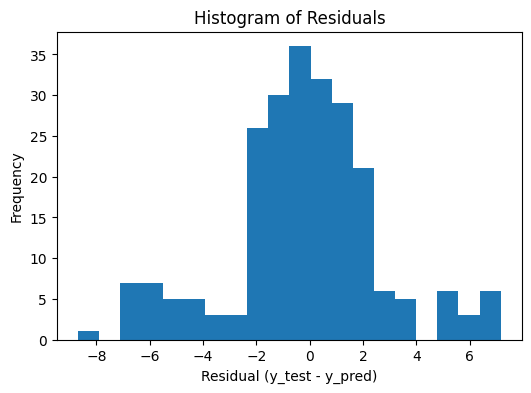

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residual (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()


**Regression evaluation metrices**

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


MAE: 2.047086538099081
MSE: 7.980128888344583
RMSE: 2.8249121912626918


**R-square value**

In [34]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.916


In [35]:
import numpy as np

print("Min prediction:", np.min(y_pred))
print("Max prediction:", np.max(y_pred))


Min prediction: 6.684630460250631
Max prediction: 40.72967616662036


In [36]:
scaled_preds = y_pred / np.max(y_pred)
print(np.min(scaled_preds), np.max(scaled_preds))


0.1641218661524483 1.0


In [40]:
data_min = np.min(y_test)
data_max = np.max(y_test)
scaled_val = (100 - data_min) / (data_max - data_min)
print(scaled_val)



2.5504087193460485


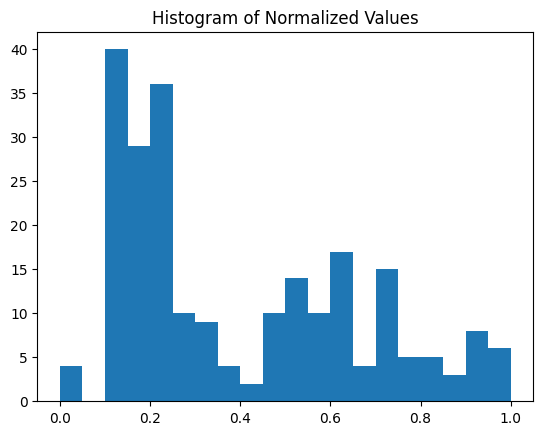

In [41]:
normalized = (y_test - data_min) / (data_max - data_min)

plt.hist(normalized, bins=20)
plt.title("Histogram of Normalized Values")
plt.show()